In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\abhimanyu\OneDrive\Desktop\Documents\Auto Sales data.csv")

In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace = True)

In [7]:
# STEP 5: Cleaning & Preprocessing the Data

# 1. Convert 'ORDERDATE' to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# 2. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 3. Create new columns
# Total revenue per order
df['TOTALREVENUE'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Extract month and year for trend analysis
df['ORDERMONTH'] = df['ORDERDATE'].dt.to_period('M').astype(str)

# 4. Drop rows where critical columns are missing
df_cleaned = df.dropna(subset=['ORDERDATE', 'QUANTITYORDERED', 'PRICEEACH', 'SALES'])

# Display cleaned data
df_cleaned.head()


Missing values per column:
ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


C:\Users\abhimanyu\AppData\Local\Temp\ipykernel_21320\2993820324.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,TOTALREVENUE,ORDERMONTH
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2871.00,2018-02
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2765.90,2018-05
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,3884.34,2018-07
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,3746.70,2018-08
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,3479.76,2018-10


C:\Users\abhimanyu\AppData\Local\Temp\ipykernel_21320\2700183338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


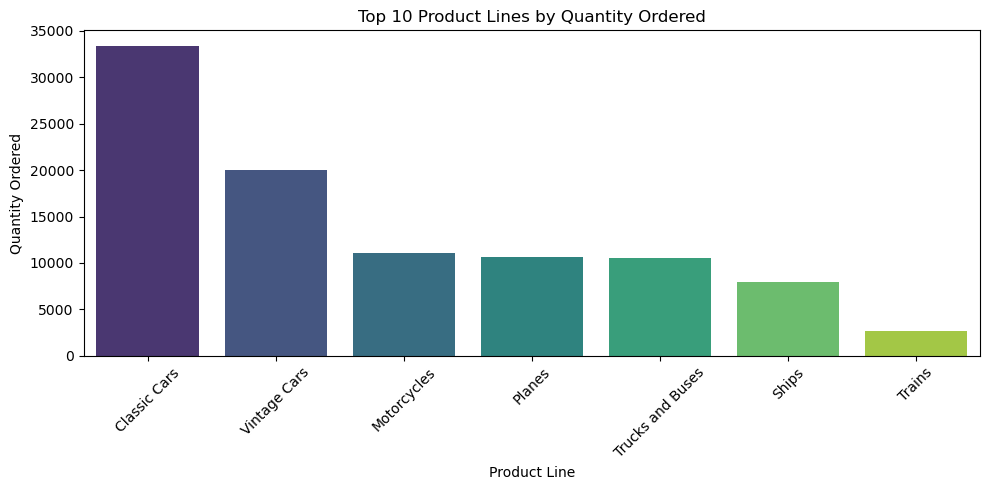

In [8]:
top_products = df_cleaned.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title('Top 10 Product Lines by Quantity Ordered')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

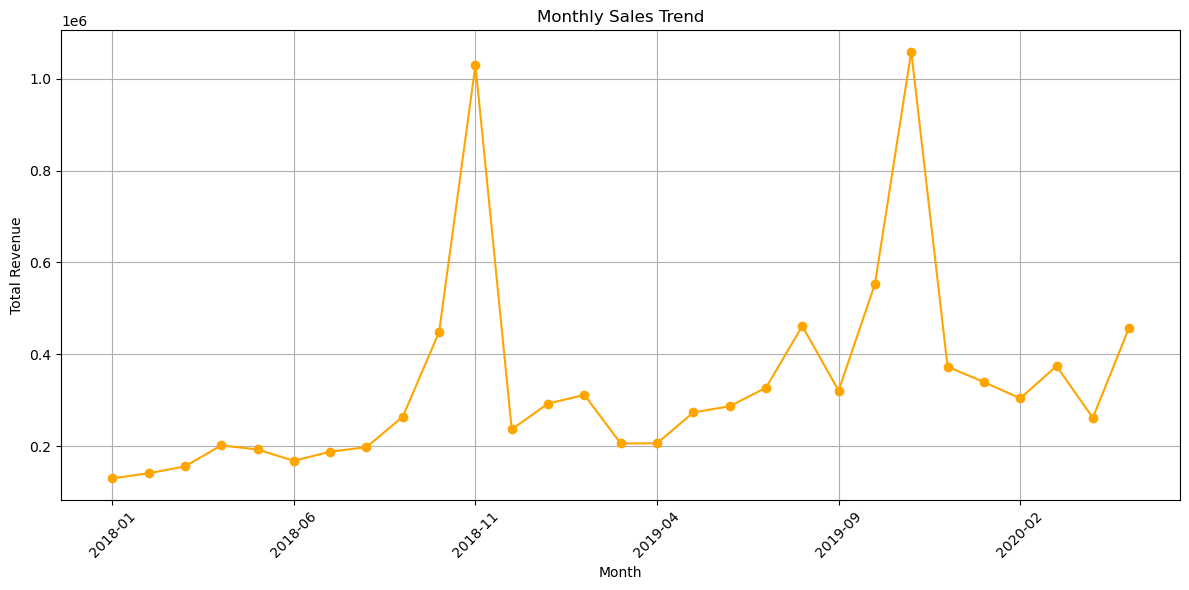

In [9]:
monthly_sales = df_cleaned.groupby('ORDERMONTH')['TOTALREVENUE'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\abhimanyu\AppData\Local\Temp\ipykernel_21320\4127594645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10).values, palette='magma')


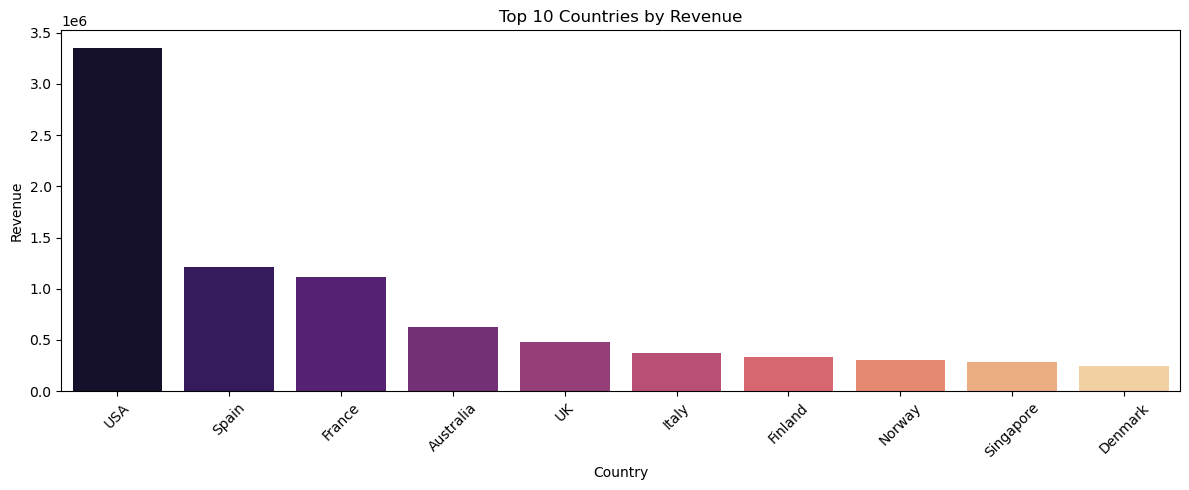

In [15]:
country_sales=df_cleaned.groupby("COUNTRY")['TOTALREVENUE'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10).values, palette='magma')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

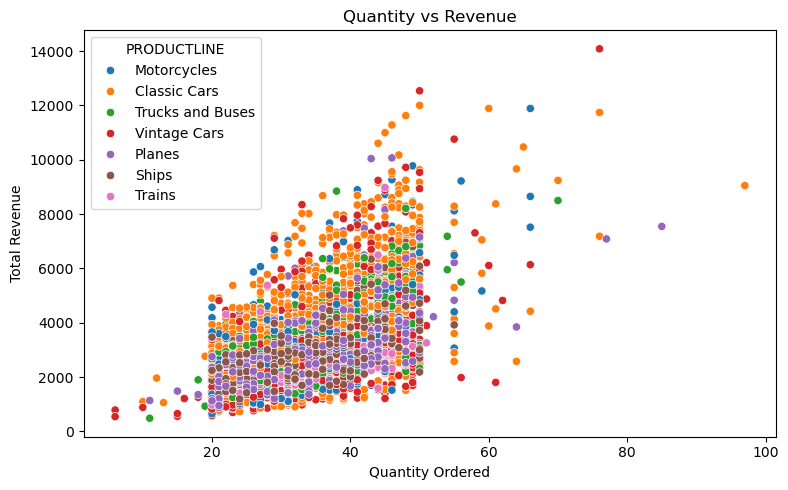

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='QUANTITYORDERED', y='TOTALREVENUE', data=df_cleaned, hue='PRODUCTLINE')
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


In [23]:
df_cleaned.to_csv("cleaned_auto_sales_data.csv", index=False)

In [25]:
import os
os.getcwd()

'C:\\Users\\abhimanyu'